In [1]:
import tensorflow as tf
from keras import layers,models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [3]:
# load and processing the data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [15]:
# reshaping the data to add a channel dimension 
x_train=x_train.reshape((x_train.shape[0],28,28,1)).astype('float32')/255
x_test=x_test.reshape((x_test.shape[0],28,28,1)).astype('float32')/255

In [26]:
# Convert the labels to categoricall one hot encoding 
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [39]:
# Build the CNN model 
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())  #Embedding of an image 
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))     

C:\Users\dilee\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
# compile the data
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
# train the data 
history=model.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8726 - loss: 0.4044 - val_accuracy: 0.9862 - val_loss: 0.0446
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9847 - loss: 0.0505 - val_accuracy: 0.9850 - val_loss: 0.0445
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9887 - loss: 0.0377 - val_accuracy: 0.9903 - val_loss: 0.0299
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9910 - loss: 0.0276 - val_accuracy: 0.9890 - val_loss: 0.0354
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9936 - loss: 0.0209 - val_accuracy: 0.9910 - val_loss: 0.0298


In [51]:
# evaluating the model
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f'Test accuracy :{test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0382
Test accuracy :0.9910


Text(0, 0.5, 'Accuracy')

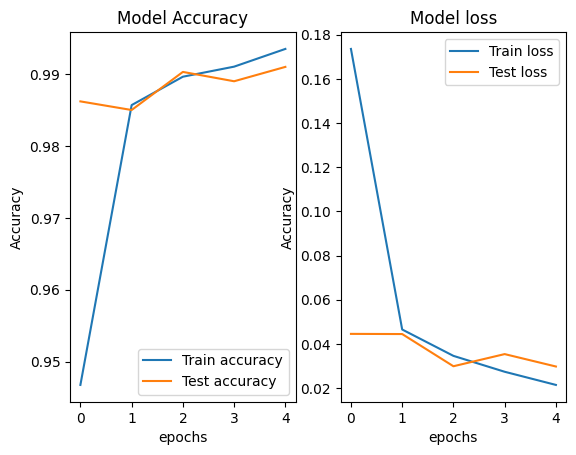

In [57]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Test accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel("epochs")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='Test loss')
plt.legend()
plt.title('Model loss')
plt.xlabel("epochs")
plt.ylabel("Accuracy")

In [77]:
!pip install opencv-python-headless

   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB 653.6 kB/s eta 0:01:01
   ---------------------------------------- 0.2/39.4 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.2/39.4 MB 1.5 MB/s eta 0:00:26
   ---------------------------------------- 0.4/39.4 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.6/39.4 MB 2.3 MB/s eta 0:00:17
    --------------------------------------- 0.7/39.4 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 1.0/39.4 MB 2.9 MB/s eta 0:00:14
   - -------------------------------------- 1.2/39.4 MB 3.1 MB/s eta 0:00:13
   - -------------------------------------- 1.5/39.4 MB 3.6 MB/s eta 0:00:11
   - -------------------------------------- 1.9/39.4 MB 4.0 MB/s eta 0:00:10
   -- ------------------------------------- 2.3/39.4 MB 4.4 MB/s eta 0:00:09
   -- -----

In [79]:
import cv2

In [81]:
# # to read an image 
# img=cv2.imread('Profile.jpg')

In [93]:
# #importing more than ine image 
# from glob import glob 
# file=glob("path of the images")

In [ ]:
# image=[]
# for i in file:
#     img=cv2.imread(i)
#     img=img.resize(img,(28,28))
#     image.append(img)
# images=np.array(image)

In [101]:
import numpy as np
from PIL import Image

def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    
    # Convert to a numpy array and normalize
    img_array = np.array(img).astype('float32') / 255.0
    
    # Reshape to match model input shape
    img_array = img_array.reshape(1, 28, 28, 1)
    
    return img_array


In [103]:
# Preprocess the new image
image_path = 'mnist_3.jpg'  # Replace with the path to your image
new_image = preprocess_image(image_path)

# Predict the class
predictions = model.predict(new_image)
predicted_class = np.argmax(predictions)  # Get the class with the highest probability

print(f"The model predicts this image as class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
The model predicts this image as class: 3


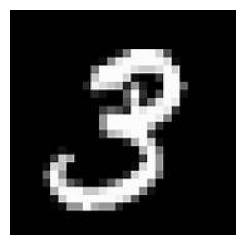

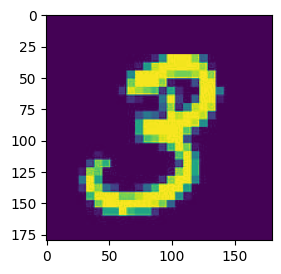

In [113]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image = cv2.imread('mnist_3.jpg')
img=Image.open(image_path).convert('L')
# Display the image
plt.subplot(1,2,1)
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

plt.subplot(1,2,2)
plt.imshow(img)
plt.show()